EL4233 - DSKC
Homework 2

Yoseph Amadeus Abel Puspodewo - 13216048;
Vinaldo Richard - 13216016;
Hiysam Fuady Siregar - 13216083;
Muhamad Alfarisy - 13216114;
Muhammad Farras M. - 13216098;
Jakfar Siddiq - 13216043;
Muhammad Choirudin Malik - 13216097;
Khudzaifah Bin Zahid - 13216072;

## Part 1: Create Linear Regression

In [48]:
# To Do: Import data processing packages
import numpy as np
import pandas as pd
import random as rnd

In [49]:
# To Do: Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# To Do: Import scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# To Do: Load Datasets
from sklearn import datasets

In [52]:
# To Do: Load dasasets from scikit learn dataset library
boston = datasets.load_boston()

In [53]:
# To Do: Print data description using built-in function from scikit-learn
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [54]:
# To Do: Define the data/predictors as the pre-set feature names  
features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [55]:
# To Do: Print features head 
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
# To Do: Print object type of features
print(features.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [57]:
# To Do: Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(boston.target, columns=['MEDV'])

In [58]:
# To Do: Print target head list
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [59]:
# To Do: Print object type of features
print(target.head)

<bound method NDFrame.head of      MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]>


In [60]:
# To Do: Create new object for training
X = features
y = target

In [61]:
# To Do: Create linear regression model
model = LinearRegression()

In [62]:
# To Do: Fit the data to the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# To Do: Calculate model score
model.score(X,y)

0.7406426641094095

In [64]:
# To Do: Calculate b0
model.intercept_

array([36.45948839])

In [65]:
# To Do: Calculate bn for n= number of features
model.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [66]:
# To Do: Calculate predictions using regressor data as input, and print five first result
predictions = model.predict(X)
print(predictions[0:5])

[[30.00384338]
 [25.02556238]
 [30.56759672]
 [28.60703649]
 [27.94352423]]


## Part 2: Split Data for Train and Test

In [67]:
# To Do: Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [68]:
# To Do: Make sure the X_train data shape
X_train.shape

(404, 13)

In [69]:
# To Do: Make sure the y_train data shape
y_train.shape

(404, 1)

In [70]:
# To Do: Make sure the X_test data shape
X_test.shape

(102, 13)

In [71]:
# To Do: Make sure the y_test data shape
y_train.shape

(404, 1)

In [72]:
# To Do: Create regressor and fit data train
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# To Do: Calculate model score for data train
train_score = regressor.score(X_train,y_train)
print('data train - coefficient of determination:', train_score)

data train - coefficient of determination: 0.7730135569264234


In [74]:
# To Do: Calculate model score for data test
test_score = regressor.score(X_test,y_test)
print('data test - coefficient of determination:', test_score)

data test - coefficient of determination: 0.5892223849182507


## Part 3: Combine Data

In [75]:
# To Do: Create new dataframe containing features and target
combine = features.copy()
combine.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
# To Do: Combine both datasets
combine['MEDV'] = target
combine.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
# To Do: Make sure the combine data shape
combine.shape

(506, 14)

In [78]:
# To Do: Using pandas function, describe combine dataframe
combine.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [79]:
# To Do: Make sure there are no null value
combine.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

## Part 4: Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025610490C88>]],
      dtype=object)

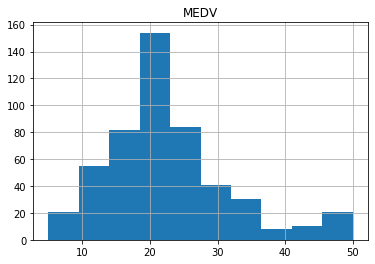

In [80]:
# To Do: Inspect MEDV histogram
target.hist()

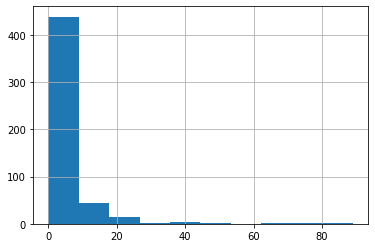

In [81]:
# To Do: Inspect CRIM histogram
features['CRIM'].hist()

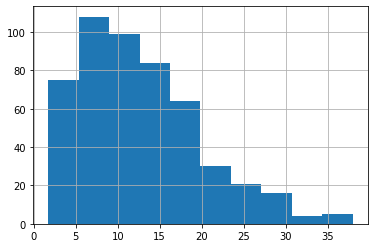

In [82]:
# To Do: Inspect LSTAT histogram
features['LSTAT'].hist()

## Part 5: Homework 2

Create multiple linear regression model using only three features from features dataframe to predict MEDV. 
The three features must be chosen based on analysis.
Utilize pandas and seaborn to process and visualize data.
Aim for the highest score as possible as you can.

Submission start: March, 9th 2020.
Submission end:   March, 16th 2020.

Buat linear regression dari 3 fitur yang menurut kita paling ngaruh. Jelaskan kenapa memilih fitur tsb dan coba raih akurasi setinggi mungkin

In [116]:
#To make a new data frame of features
df = features.copy()
print(df.keys())

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')


In [109]:
#To combine data frame features and target
df['MEDV'] = target

Index(['RM', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')


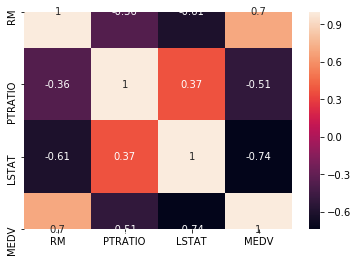

In [114]:
# To see the correlation matrix from the features and target
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
print(df.keys())

In [115]:
print(df.keys())

Index(['RM', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')


In [111]:
#Choose the biggest absoluve value of features correlation: RM, LSTAT, PTRATIO
df = df.drop(["CRIM", "AGE", "INDUS", "CHAS", "NOX", "RAD", "TAX", "ZN", "DIS", "B"], axis=1)

KeyError: "['CRIM' 'AGE' 'INDUS' 'CHAS' 'NOX' 'RAD' 'TAX' 'ZN' 'DIS' 'B'] not found in axis"

In [101]:
X = features
y = target

In [102]:
model = LinearRegression()

In [103]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
model.score(X,y)

0.6786241601613112

In [105]:
model.intercept_

array([18.56711151])

In [106]:
model.coef_

array([[ 4.51542094, -0.93072256, -0.57180569]])

In [107]:
predictions = model.predict(X)
print(predictions[0:5])

[[31.16835679]
 [25.76746391]
 [32.13917258]
 [31.08040676]
 [30.38658889]]


In [94]:
# To Do: Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [48]:
# To Do: Create regressor and fit data train
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# To Do: Calculate model score for data train
train_score = regressor.score(X_train,y_train)
print('data train - coefficient of determination:', train_score)

data train - coefficient of determination: 0.721859247739624


In [50]:
# To Do: Calculate model score for data test
test_score = regressor.score(X_test,y_test)
print('data test - coefficient of determination:', test_score)

data test - coefficient of determination: 0.4881642015692511


In [117]:
# To improve the accuracy: polynomial features
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

In [52]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_test = r2_score(y_train, y_train_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 3.7644639611228676
R2 score of test set is 0.8335615489035172


In [53]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 5.477983100882068
R2 score of test set is 0.6314764325675188


In [54]:
#Referensi
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
#https://www.kaggle.com/kunalc101/boston-housing-linear-and-polynomial-regression